## load packages

In [2]:
import google.datalab.storage as storage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from google.datalab import Context
import random, string

p = sns.color_palette()

## load data

In [3]:
my_bucket = storage.Bucket('capstone-02/data')

test = my_bucket.object('clicks_test.csv')
uri = test.uri
%gcs read --object $uri --variable c_test
test = pd.read_csv(BytesIO(c_test))
test.head(5)

,display_id,ad_id
0,16874594,66758
1,16874594,150083
2,16874594,162754
3,16874594,170392
4,16874594,172888


In [4]:
train = my_bucket.object('clicks_train.csv')
uri = train.uri
%gcs read --object $uri --variable c_test
train = pd.read_csv(BytesIO(c_test))
train.head(5)

,display_id,ad_id,clicked
0,1,42337,0
1,1,139684,0
2,1,144739,1
3,1,156824,0
4,1,279295,0


## clicks_train

In [9]:
print(train.shape)
print(train.display_id.unique().shape)
print(train.ad_id.unique().shape)

(87141731, 3)
(16874593,)
(478950,)


In [16]:
# 디스플레이 별 광고 개수는 2~12. 각 분포는? 
train_dis_ad = train.groupby('display_id')['ad_id'].count().value_counts()
train_dis_ad

4     5421764
6     5005527
3     1696425
5     1438599
8     1121697
9     1044047
2      802498
10     230262
7      100677
12      12822
11        275
Name: ad_id, dtype: int64

Text(0,0.5,u'Proportion of set')

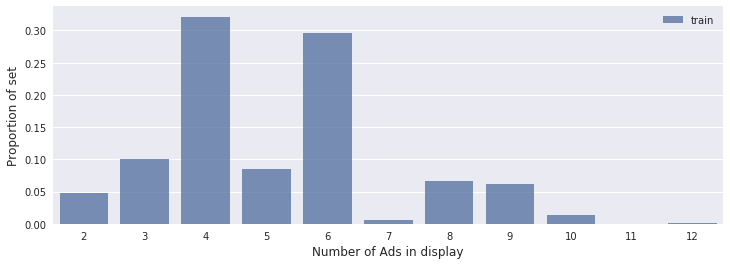

In [11]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 디스플레이 별 광고 개수가 몇 개일까? 그리고 비율은?
size_train = train.groupby('display_id')['ad_id'].count().value_counts()
size_train = size_train / np.sum(size_train)

# plotting
plt.figure(figsize=(12,4))
sns.barplot(size_train.index, size_train.values, alpha=0.8, color=p[0], label='train')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

In [26]:
# 광고 별 디스플레이 노출 빈도수는? 1회 ~ 211824회
train_ad_dis = train.groupby('ad_id')['ad_id'].count().sort_values(ascending=False)
print(train_ad_dis.head())
print(train_ad_dis.tail())

ad_id
173005    211824
180923    203159
123742    202099
151028    181319
173006    168139
Name: ad_id, dtype: int64
ad_id
230032    1
230031    1
230029    1
230025    1
268955    1
Name: ad_id, dtype: int64


Ads that appear less than 2 times: 22.69%
Ads that appear less than 5 times: 46.55%
Ads that appear less than 10 times: 61.74%
Ads that appear less than 50 times: 86.93%
Ads that appear less than 100 times: 91.04%
Ads that appear less than 1000 times: 97.45%


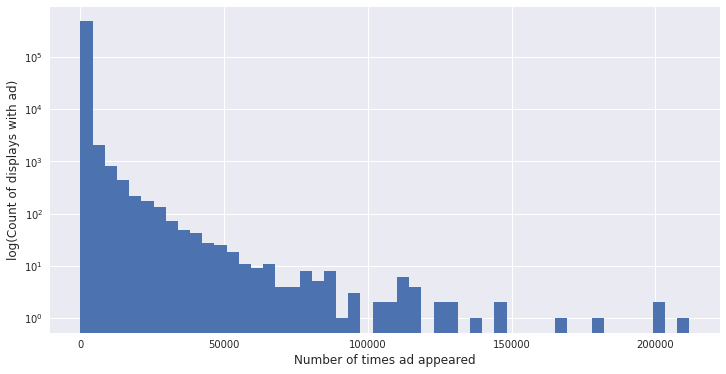

In [25]:
for i in [2, 5, 10, 50, 100, 1000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((train_ad_dis < i).mean() * 100, 2)))

# plotting
plt.figure(figsize=(12,6))
plt.hist(train_ad_dis.values, bins=50, log=True)
plt.xlabel('Number of times ad appeared', fontsize=12)
plt.ylabel('log(Count of displays with ad)', fontsize=12)
plt.show()

In [28]:
# 광고의 노출빈도 평균 : 182회
print(train_ad_dis.mean())
# 광고의 노출빈도 중앙값 : 5회
print(train_ad_dis.median())

181.9432738281658
5.0


In [40]:
# train의 평균 CTR(클릭/노출)에 대해 알아보자
i = train.groupby('ad_id')['display_id'].count().astype(float)
j = train.groupby('ad_id')['clicked'].sum().astype(float)
ctr = j/i
ctr.percent = ctr * 100
# ctr = round(j/i, 4)

In [41]:
print(ctr.head())
print(ctr.percent.mean()) # 평균 CTR : 14.3%

ad_id
1    0.000000
2    0.045455
3    0.068323
4    0.125000
5    0.000000
dtype: float64
14.322410115406036


## clicks_test

In [42]:
print(test.shape)
print(test.display_id.unique().shape)
print(test.ad_id.unique().shape)

(32225162, 2)
(6245533,)
(381385,)


In [43]:
# 디스플레이 별 광고 개수는 2~12. 각 분포는? 
test_dis_ad = test.groupby('display_id')['ad_id'].count().value_counts()
test_dis_ad

4     1969343
6     1853510
3      635560
5      577964
8      420261
9      388488
2      290611
10      67038
7       38572
12       4098
11         88
Name: ad_id, dtype: int64

Text(0,0.5,u'Proportion of set')

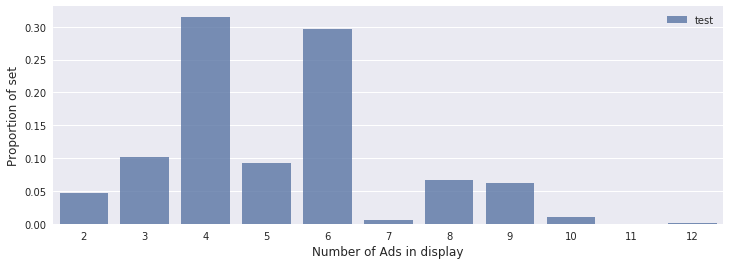

In [44]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# 디스플레이 별 광고 개수가 몇 개일까? 그리고 비율은?
size_test = test.groupby('display_id')['ad_id'].count().value_counts()
size_test = size_test / np.sum(size_test)

# plotting
plt.figure(figsize=(12,4))
sns.barplot(size_test.index, size_test.values, alpha=0.8, color=p[0], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

In [45]:
# 광고 별 디스플레이 노출 빈도수는? 1회 ~ 211824회
test_ad_dis = test.groupby('ad_id')['ad_id'].count().sort_values(ascending=False)
print(train_ad_dis.head(1))
print(train_ad_dis.tail(1))

ad_id
173005    211824
Name: ad_id, dtype: int64
ad_id
268955    1
Name: ad_id, dtype: int64


Ads that appear less than 2 times: 30.32%
Ads that appear less than 5 times: 61.5%
Ads that appear less than 10 times: 75.92%
Ads that appear less than 50 times: 90.62%
Ads that appear less than 100 times: 93.35%
Ads that appear less than 1000 times: 98.4%


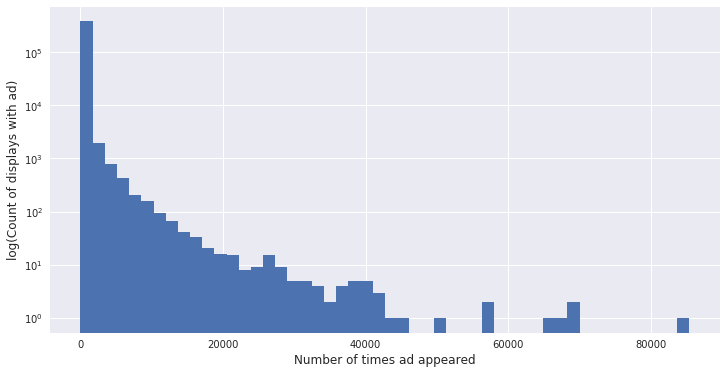

In [46]:
for i in [2, 5, 10, 50, 100, 1000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((test_ad_dis < i).mean() * 100, 2)))

# plotting
plt.figure(figsize=(12,6))
plt.hist(test_ad_dis.values, bins=50, log=True)
plt.xlabel('Number of times ad appeared', fontsize=12)
plt.ylabel('log(Count of displays with ad)', fontsize=12)
plt.show()

In [47]:
# 광고의 노출빈도 평균 : 84회
print(test_ad_dis.mean())
# 광고의 노출빈도 중앙값 : 3회
print(test_ad_dis.median())

84.49509550716468
3.0


## clicks_train & clicks_test merge

Text(0,0.5,u'Proportion of set')

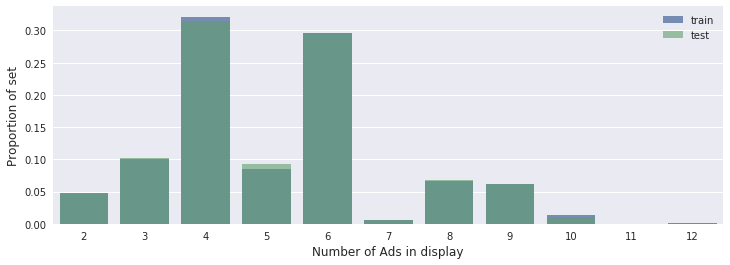

In [48]:
# train과 test 각각 디스플레이 별 광고 개수의 분포가 비슷할까? 비슷하다
# plotting
plt.figure(figsize=(12,4))
sns.barplot(size_train.index, size_train.values, alpha=0.8, color=p[0], label='train')
sns.barplot(size_test.index, size_test.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

In [63]:
# test에 있는 ad_id가 train에도 있을까? 있다면 몇 퍼센트일까?
ad_prop = round(len(set(test.ad_id.unique()).intersection(train.ad_id.unique()))) / round(len(test.ad_id.unique()))
print('Proportion of test ads in test that are in train set: {}%'.format(round(ad_prop*100, 2)))

Proportion of test ads in test that are in train set: 82.87%
